<a href="https://colab.research.google.com/github/betr0dalf/TIMO/blob/main/TIMO_NovikovDV_sem2_prac1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Технологии и инструментарий машинного обучения
# Практическая работа № 1
# Выполнил студент группы ИНБО-05-22
# Новиков Денис Владиславович

## Импорт необходимых библиотек

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.datasets import load_breast_cancer
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

## Часть 1: Общий пример на MNIST
1. Импортируйте необходимые библиотеки (TensorFlow/PyTorch, Matplotlib, NumPy).
2. Загрузите датасет MNIST (из библиотек keras.datasets или torchvision.datasets). Разделите его на обучающую и тестовую выборки.
3. Постройте полносвязную нейронную сеть с использованием следующих параметров:
*   Входной слой, преобразующий изображение 28x28 в вектор длины 784.
*   Один или два скрытых слоя (например, с 128 и 64 нейронами).
*   Функция активации: ReLU в скрытых слоях и Softmax на выходе.
*   Функция потерь: кросс-энтропия.
*   Оптимизатор: SGD или Adam.
4. Обучите модель на обучающей выборке и оцените точность на
тестовых данных.
5. Постройте графики:
*   Потери (loss) на обучающей и тестовой выборках.
*   Точность классификации на обучении и тестировании.
6. Добавьте визуализацию ошибок классификации (например,
изображения неверно классифицированных цифр).

In [ ]:
# Загрузка и предобработка MNIST датасета

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


In [ ]:
# Полносвязная нейронная сеть
class FullyConnectedNet(nn.Module):
    def __init__(self):
        super(FullyConnectedNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # Сглаживание изображения
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.softmax(self.fc3(x), dim=1)
        return x


In [ ]:
# Инициализация модели, функции потерь и оптимизатора
model = FullyConnectedNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Тренировка модели:
num_epochs = 5
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Оценка на основе тестового набора
    model.eval()
    running_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_loss = running_loss / len(test_loader)
    test_accuracy = 100 * correct_test / total_test
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")


Epoch 1/5, Train Loss: 1.6403, Train Accuracy: 83.38%, Test Loss: 1.5531, Test Accuracy: 91.25%
Epoch 2/5, Train Loss: 1.5444, Train Accuracy: 92.10%, Test Loss: 1.5329, Test Accuracy: 93.06%
Epoch 3/5, Train Loss: 1.5268, Train Accuracy: 93.72%, Test Loss: 1.5261, Test Accuracy: 93.65%
Epoch 4/5, Train Loss: 1.5175, Train Accuracy: 94.48%, Test Loss: 1.5191, Test Accuracy: 94.29%
Epoch 5/5, Train Loss: 1.5105, Train Accuracy: 95.25%, Test Loss: 1.5160, Test Accuracy: 94.63%


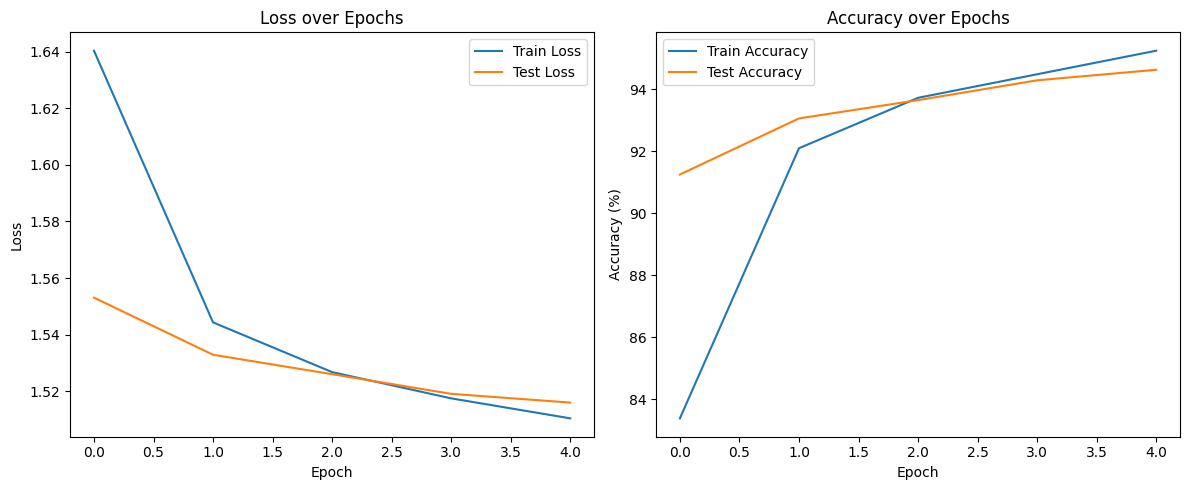

In [ ]:
# Визуализация тренировки с потерями и точностью
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Accuracy over Epochs')

plt.tight_layout()
plt.show()

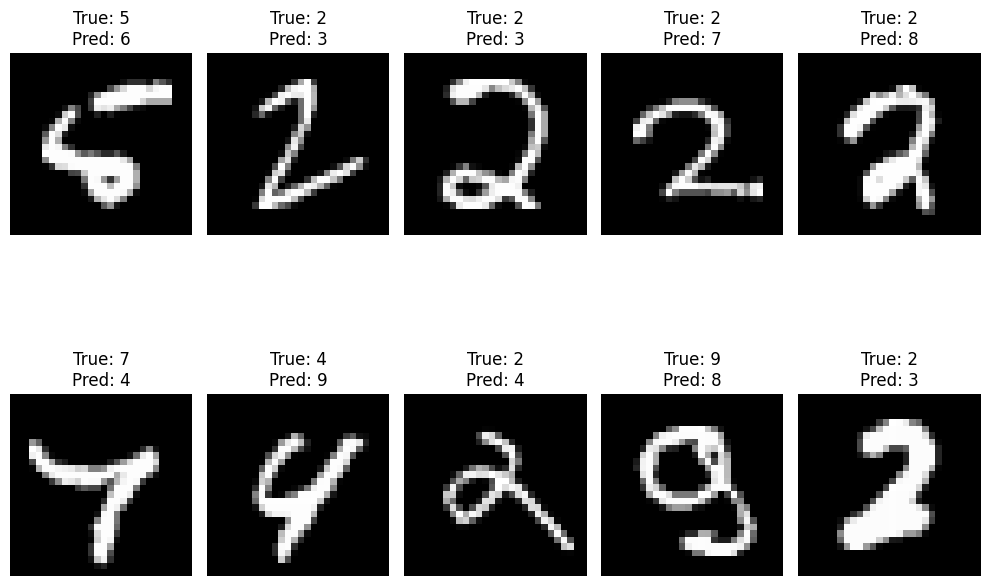

In [ ]:
# Визуализация изображения неверно классифицированных цифр
model.eval()
misclassified_images = []
misclassified_labels = []
misclassified_predictions = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        for i in range(len(predicted)):
            if predicted[i] != labels[i]:
                misclassified_images.append(images[i].cpu().numpy().squeeze())
                misclassified_labels.append(labels[i].item())
                misclassified_predictions.append(predicted[i].item())

plt.figure(figsize=(10, 8))
for i in range(min(10, len(misclassified_images))):
    plt.subplot(2, 5, i + 1)
    plt.imshow(misclassified_images[i], cmap='gray')
    plt.title(f"True: {misclassified_labels[i]}\nPred: {misclassified_predictions[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


## Часть 2: Индивидуальные задания
1. Каждому студенту дается индивидуальный набор данных из Kaggle или OpenML (например, датасеты по классификации цветов, текстов или изображений).
2. Постройте полносвязную нейронную сеть для своей задачи классификации. Требования:
* Минимум 3 слоя (входной, один или два скрытых, выходной).
* Попробуйте разные размеры скрытых слоев (128, 256, 512
нейронов) и функции активации (ReLU, Sigmoid, Tanh).
* Подберите гиперпараметры: количество эпох, размер мини-
выборки (batch size), метод оптимизации.
3. Визуализируйте процесс обучения с использованием Matplotlib или
TensorBoard:
* Графики потерь и точности на обучении и тестировании.
4. Проведите анализ переобучения. Включите Dropout в архитектуру
сети и сравните результаты с его использованием и без него.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Загрузка датасета
data = load_breast_cancer()
X = data.data
y = data.target

# Разделение выборки на тестовую и тренировочную
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Конвертируем данные в тензоры
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


In [ ]:
# Полносвязная нейронная сеть с дропаутом
class FullyConnectedNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob=0.0):
        super(FullyConnectedNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size // 2)
        self.fc3 = nn.Linear(hidden_size // 2, output_size)
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.softmax(self.fc3(x), dim=1)
        return x


In [ ]:
# Функция для тренировки и оценки
def train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs):
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_accuracy = 100 * correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Оценка на тестовой выборке
        model.eval()
        running_loss = 0.0
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                running_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        test_loss = running_loss / len(test_loader)
        test_accuracy = 100 * correct_test / total_test
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    return train_losses, test_losses, train_accuracies, test_accuracies


In [ ]:
# Гиперпараметры
input_size = X_train.shape[1]
hidden_size = 256
output_size = 2
num_epochs = 20

# Тренировка и оценка модели без дропаута
model_without_dropout = FullyConnectedNet(input_size, hidden_size, output_size, dropout_prob=0.0)
criterion = nn.CrossEntropyLoss()
optimizer_without_dropout = optim.Adam(model_without_dropout.parameters(), lr=0.001)
train_losses_no_dropout, test_losses_no_dropout, train_accuracies_no_dropout, test_accuracies_no_dropout = train_and_evaluate(model_without_dropout, train_loader, test_loader, criterion, optimizer_without_dropout, num_epochs)

# Тренировка и оценка модели с дропаутом
model_with_dropout = FullyConnectedNet(input_size, hidden_size, output_size, dropout_prob=0.5)
optimizer_with_dropout = optim.Adam(model_with_dropout.parameters(), lr=0.001)
train_losses_dropout, test_losses_dropout, train_accuracies_dropout, test_accuracies_dropout = train_and_evaluate(model_with_dropout, train_loader, test_loader, criterion, optimizer_with_dropout, num_epochs)


Epoch 1/20, Train Loss: 0.5689, Train Accuracy: 90.55%, Test Loss: 0.4445, Test Accuracy: 97.37%
Epoch 2/20, Train Loss: 0.4061, Train Accuracy: 94.07%, Test Loss: 0.3661, Test Accuracy: 97.37%
Epoch 3/20, Train Loss: 0.3614, Train Accuracy: 95.38%, Test Loss: 0.3461, Test Accuracy: 97.37%
Epoch 4/20, Train Loss: 0.3469, Train Accuracy: 97.14%, Test Loss: 0.3397, Test Accuracy: 98.25%
Epoch 5/20, Train Loss: 0.3374, Train Accuracy: 98.24%, Test Loss: 0.3371, Test Accuracy: 98.25%
Epoch 6/20, Train Loss: 0.3336, Train Accuracy: 98.46%, Test Loss: 0.3354, Test Accuracy: 99.12%
Epoch 7/20, Train Loss: 0.3346, Train Accuracy: 98.68%, Test Loss: 0.3355, Test Accuracy: 98.25%
Epoch 8/20, Train Loss: 0.3295, Train Accuracy: 98.46%, Test Loss: 0.3357, Test Accuracy: 98.25%
Epoch 9/20, Train Loss: 0.3297, Train Accuracy: 98.68%, Test Loss: 0.3366, Test Accuracy: 97.37%
Epoch 10/20, Train Loss: 0.3278, Train Accuracy: 98.90%, Test Loss: 0.3364, Test Accuracy: 97.37%
Epoch 11/20, Train Loss: 0.32

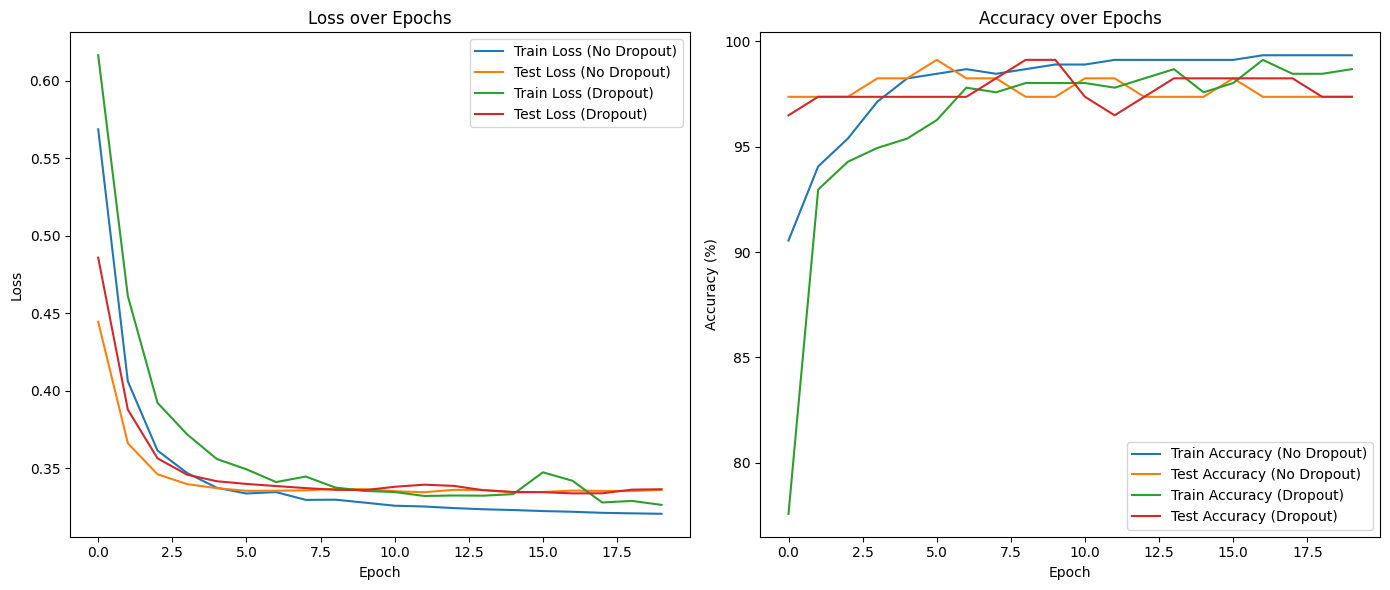

In [ ]:
# Визуализация тренировки с потерями и точностью
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(train_losses_no_dropout, label='Train Loss (No Dropout)')
plt.plot(test_losses_no_dropout, label='Test Loss (No Dropout)')
plt.plot(train_losses_dropout, label='Train Loss (Dropout)')
plt.plot(test_losses_dropout, label='Test Loss (Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies_no_dropout, label='Train Accuracy (No Dropout)')
plt.plot(test_accuracies_no_dropout, label='Test Accuracy (No Dropout)')
plt.plot(train_accuracies_dropout, label='Train Accuracy (Dropout)')
plt.plot(test_accuracies_dropout, label='Test Accuracy (Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Accuracy over Epochs')

plt.tight_layout()
plt.show()


## Часть 3: Сравнительный анализ и защита
1. Сравните модели с разными функциями активации.
2. Выполните защиту результатов, представив:
* Основные метрики качества (точность, F1-мера).
* Влияние гиперпараметров на сходимость.

In [ ]:
# Загрузка датасета
data = load_breast_cancer()
X = data.data
y = data.target

# Разделение выборки на тестовую и тренировочную
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Конвертируем данные в тензоры
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)


In [ ]:
# Полносвязная нейронная сеть с разными функциями активации
class FullyConnectedNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, activation='relu', dropout_prob=0.5):
        super(FullyConnectedNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size // 2)
        self.fc3 = nn.Linear(hidden_size // 2, output_size)
        self.dropout = nn.Dropout(dropout_prob)
        self.activation = activation

    def forward(self, x):
        if self.activation == 'relu':
            activation_function = torch.relu
        elif self.activation == 'sigmoid':
            activation_function = torch.sigmoid
        elif self.activation == 'tanh':
            activation_function = torch.tanh
        else:
            raise ValueError("Unsupported activation function")

        x = activation_function(self.fc1(x))
        x = self.dropout(x)
        x = activation_function(self.fc2(x))
        x = self.dropout(x)
        x = torch.softmax(self.fc3(x), dim=1)
        return x


In [ ]:
# Функция для тренировки и оценки
def train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs):
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_accuracy = 100 * correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Оценка на тестовой выборке
        model.eval()
        running_loss = 0.0
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                running_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        test_loss = running_loss / len(test_loader)
        test_accuracy = 100 * correct_test / total_test
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    return train_losses, test_losses, train_accuracies, test_accuracies


In [ ]:
# Функция для оценки модели
def evaluate_model(model, test_loader):
    model.eval()
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    return accuracy, f1


In [ ]:
# Гиперпараметры
input_size = X_train.shape[1]
hidden_size = 256
output_size = 2
num_epochs = 20
batch_size = 64

# Загрузка данных
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Тренировка моделей с разными функциями активации
activation_functions = ['relu', 'sigmoid', 'tanh']
results = {}

for activation in activation_functions:
    print(f"Training model with activation function: {activation}")
    model = FullyConnectedNet(input_size, hidden_size, output_size, activation=activation, dropout_prob=0.5)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_losses, test_losses, train_accuracies, test_accuracies = train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs)
    accuracy, f1 = evaluate_model(model, test_loader)
    results[activation] = {'accuracy': accuracy, 'f1': f1, 'train_losses': train_losses, 'test_losses': test_losses, 'train_accuracies': train_accuracies, 'test_accuracies': test_accuracies}


Training model with activation function: relu
Epoch 1/20, Train Loss: 0.6259, Train Accuracy: 75.16%, Test Loss: 0.5222, Test Accuracy: 97.37%
Epoch 2/20, Train Loss: 0.4799, Train Accuracy: 94.07%, Test Loss: 0.4047, Test Accuracy: 96.49%
Epoch 3/20, Train Loss: 0.4058, Train Accuracy: 93.63%, Test Loss: 0.3619, Test Accuracy: 96.49%
Epoch 4/20, Train Loss: 0.3663, Train Accuracy: 95.38%, Test Loss: 0.3484, Test Accuracy: 96.49%
Epoch 5/20, Train Loss: 0.3674, Train Accuracy: 96.26%, Test Loss: 0.3428, Test Accuracy: 97.37%
Epoch 6/20, Train Loss: 0.3515, Train Accuracy: 95.82%, Test Loss: 0.3401, Test Accuracy: 97.37%
Epoch 7/20, Train Loss: 0.3501, Train Accuracy: 97.58%, Test Loss: 0.3399, Test Accuracy: 97.37%
Epoch 8/20, Train Loss: 0.3409, Train Accuracy: 97.58%, Test Loss: 0.3411, Test Accuracy: 97.37%
Epoch 9/20, Train Loss: 0.3396, Train Accuracy: 97.14%, Test Loss: 0.3390, Test Accuracy: 97.37%
Epoch 10/20, Train Loss: 0.3330, Train Accuracy: 98.24%, Test Loss: 0.3373, Test 

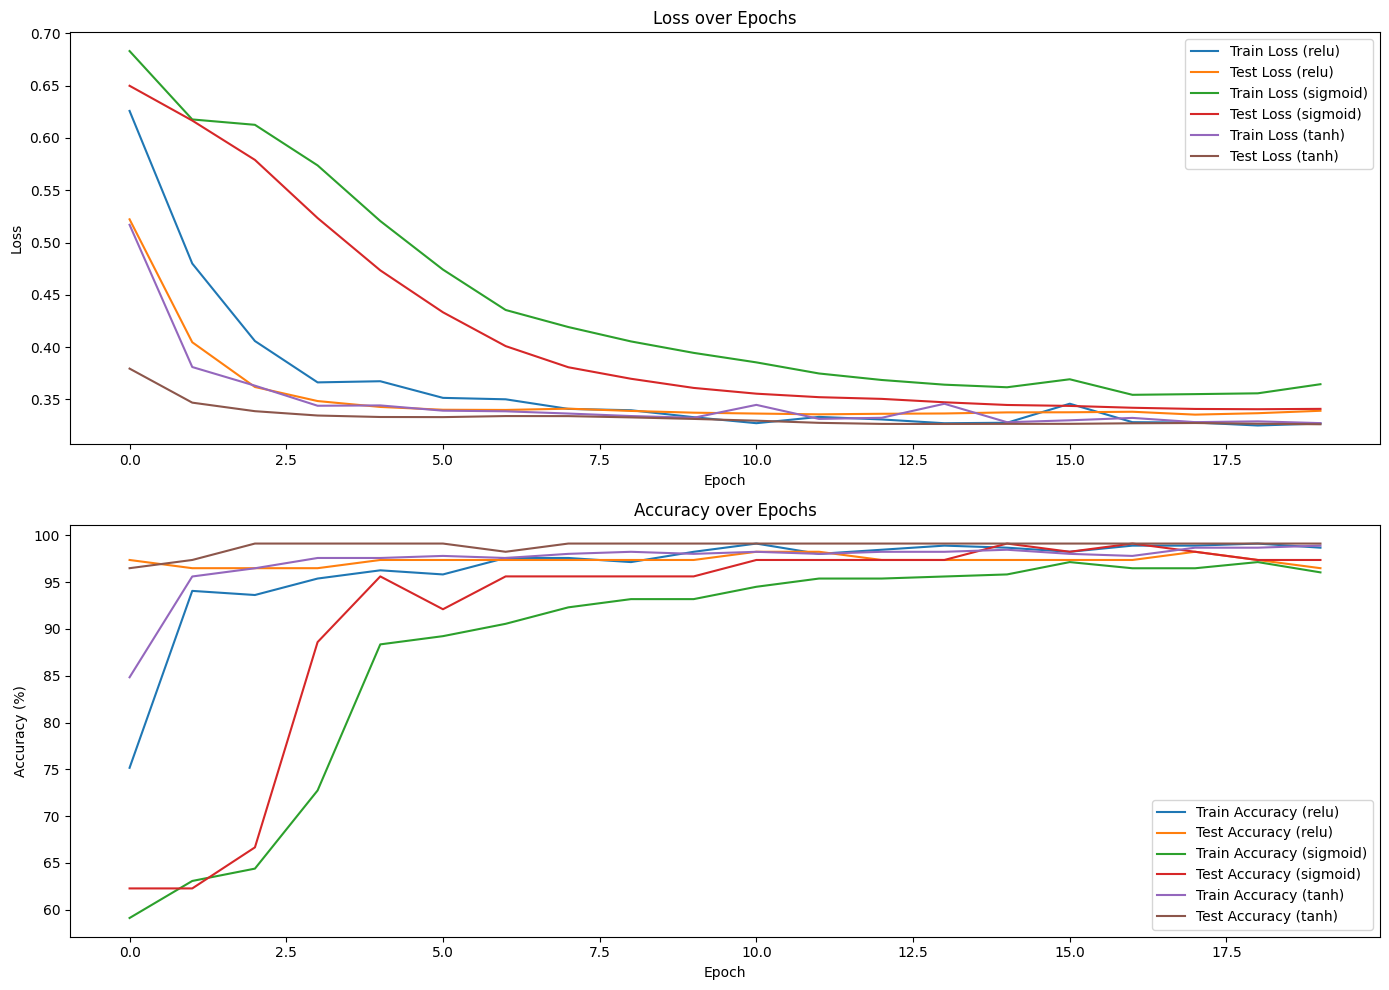

In [ ]:
# Визуализация тренировки с потерями и точностью
plt.figure(figsize=(14, 10))

for activation in activation_functions:
    plt.subplot(2, 1, 1)
    plt.plot(results[activation]['train_losses'], label=f'Train Loss ({activation})')
    plt.plot(results[activation]['test_losses'], label=f'Test Loss ({activation})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss over Epochs')

    plt.subplot(2, 1, 2)
    plt.plot(results[activation]['train_accuracies'], label=f'Train Accuracy ({activation})')
    plt.plot(results[activation]['test_accuracies'], label=f'Test Accuracy ({activation})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.title('Accuracy over Epochs')

plt.tight_layout()
plt.show()

In [ ]:
# Вывод результатов
for activation in activation_functions:
    print(f"Activation Function: {activation}")
    print(f"Accuracy: {results[activation]['accuracy']:.4f}")
    print(f"F1 Score: {results[activation]['f1']:.4f}")
    print("-----------------------------")

# Анализ влияния гиперпараметров на сходимость
learning_rates = [0.01, 0.001, 0.0001]
batch_sizes = [32, 64, 128]
epochs = [10, 20, 30]

best_accuracy = 0
best_f1 = 0
best_params = {}

for lr in learning_rates:
    for batch_size in batch_sizes:
        for num_epoch in epochs:
            train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
            model = FullyConnectedNet(input_size, hidden_size, output_size, activation='relu', dropout_prob=0.5)
            optimizer = optim.Adam(model.parameters(), lr=lr)
            train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epoch)
            accuracy, f1 = evaluate_model(model, test_loader)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_f1 = f1
                best_params = {'lr': lr, 'batch_size': batch_size, 'num_epoch': num_epoch}

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)
print("Best F1 Score:", best_f1)

Activation Function: relu
Accuracy: 0.9649
F1 Score: 0.9651
-----------------------------
Activation Function: sigmoid
Accuracy: 0.9737
F1 Score: 0.9735
-----------------------------
Activation Function: tanh
Accuracy: 0.9912
F1 Score: 0.9912
-----------------------------
Epoch 1/10, Train Loss: 0.3944, Train Accuracy: 91.21%, Test Loss: 0.3294, Test Accuracy: 98.25%
Epoch 2/10, Train Loss: 0.3399, Train Accuracy: 97.14%, Test Loss: 0.3412, Test Accuracy: 96.49%
Epoch 3/10, Train Loss: 0.3544, Train Accuracy: 95.38%, Test Loss: 0.3446, Test Accuracy: 96.49%
Epoch 4/10, Train Loss: 0.3364, Train Accuracy: 97.58%, Test Loss: 0.3320, Test Accuracy: 98.25%
Epoch 5/10, Train Loss: 0.3367, Train Accuracy: 97.58%, Test Loss: 0.3550, Test Accuracy: 95.61%
Epoch 6/10, Train Loss: 0.3318, Train Accuracy: 98.02%, Test Loss: 0.3302, Test Accuracy: 98.25%
Epoch 7/10, Train Loss: 0.3334, Train Accuracy: 97.80%, Test Loss: 0.3219, Test Accuracy: 99.12%
Epoch 8/10, Train Loss: 0.3373, Train Accuracy: 